# Transfer Learning CIFAR10

* Train a simple convnet on the CIFAR dataset the first 5 output classes [0..4].
* Freeze convolutional layers and fine-tune dense layers for the last 5 ouput classes [5..9].


   ### 1. Import CIFAR10 data and create 2 datasets with one dataset having classes from 0 to 4 and other having classes from 5 to 9 

In [1]:
import tensorflow as tf
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

import os

Using TensorFlow backend.


In [2]:
import numpy as np

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Label: [9]


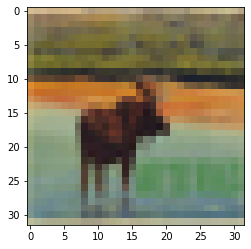

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Label: {}".format(y_train[1000]))
plt.imshow(X_train[66])


In [5]:
print("X_train",str( X_train.shape))
print("X_test",str( X_test.shape))
print("y_train",str( y_train.shape))
print("y_test",str( y_test.shape))

X_train (50000, 32, 32, 3)
X_test (10000, 32, 32, 3)
y_train (50000, 1)
y_test (10000, 1)


In [6]:
# format(y_train[0])
len(np.unique(y_train))

10

In [7]:
# print("Label: {}".format(y_train[1000]))
X_train024 = np.asarray([X_train[key] for (key, label) in enumerate(y_train) if int(label) >= 0 and int(label) <= 4])
X_test024 = np.asarray([X_test[key] for (key, label) in enumerate(y_test) if int(label) >= 0 and int(label) <= 4])



X_train529 = np.asarray([X_train[key] for (key, label) in enumerate(y_train) if int(label) >= 5 and int(label) <= 9])
X_test529 = np.asarray([X_test[key] for (key, label) in enumerate(y_test) if int(label) >= 5 and int(label) <= 9])



In [17]:
X_train024 = X_train024.astype('float32')
X_test024 = X_test024.astype('float32')
X_train529 = X_train529.astype('float32')
X_test529 = X_test529.astype('float32')

In [8]:
y_train024 = np.asarray([y_train[key] for (key, label) in enumerate(y_train) if int(label) >= 0 and int(label) <= 4])
y_test024 = np.asarray([y_test[key] for (key, label) in enumerate(y_test) if int(label) >= 0 and int(label) <= 4])

y_train529 = np.asarray([y_train[key] for (key, label) in enumerate(y_train) if int(label) >= 5 and int(label) <= 9])
y_test529 = np.asarray([y_test[key] for (key, label) in enumerate(y_test) if int(label) >= 5 and int(label) <= 9])

### 2. Use One-hot encoding to divide y_train and y_test into required no of output classes

In [9]:
y_train024 = tf.keras.utils.to_categorical(y_train024, num_classes=5)
y_test024 = tf.keras.utils.to_categorical(y_test024, num_classes=5)

In [10]:
y_train529 = y_train529 - 5
y_test529 = y_test529 - 5

y_train529 = tf.keras.utils.to_categorical(y_train529, num_classes=5)
y_test529 = tf.keras.utils.to_categorical(y_test529, num_classes=5)

### 3. Build a sequential neural network model which can classify the classes 0 to 4 of CIFAR10 dataset with at least 80% accuracy on test data

In [28]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.layers import Activation, Flatten, BatchNormalization

In [18]:
X_train024.shape[1:]

(32, 32, 3)

In [29]:
model = Sequential()
input_shape = X_train024.shape[1:]
model.add(Conv2D(32, kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dense(5,activation=tf.nn.softmax))

W0923 19:51:22.749733 11092 deprecation_wrapper.py:119] From C:\Users\obuli\.conda\envs\py36\lib\site-packages\keras\backend\tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.



In [30]:
model.compile(optimizer='sgd', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=X_train024,y=y_train024, epochs=10, validation_data=(X_test024,y_test024),batch_size=128)

Train on 25000 samples, validate on 5000 samples
Epoch 1/10
25000/25000 [==============================] - 10s 418us/step - loss: 1.1502 - acc: 0.5558 - val_loss: 1.6132 - val_acc: 0.4692
Epoch 2/10
25000/25000 [==============================] - 10s 397us/step - loss: 0.8792 - acc: 0.6542 - val_loss: 0.8657 - val_acc: 0.6676
Epoch 3/10
25000/25000 [==============================] - 10s 412us/step - loss: 0.7806 - acc: 0.6963 - val_loss: 1.1904 - val_acc: 0.5510
Epoch 4/10
25000/25000 [==============================] - 10s 401us/step - loss: 0.7188 - acc: 0.7184 - val_loss: 1.0257 - val_acc: 0.6064
Epoch 5/10
25000/25000 [==============================] - 10s 396us/step - loss: 0.6631 - acc: 0.7426 - val_loss: 0.9305 - val_acc: 0.6420
Epoch 6/10
25000/25000 [==============================] - 10s 399us/step - loss: 0.6175 - acc: 0.7616 - val_loss: 0.8747 - val_acc: 0.6826
Epoch 7/10
25000/25000 [==============================] - 10s 402us/step - loss: 0.5834 - acc: 0.7775 - val_loss: 0.7

### 4. In the model which was built above (for classification of classes 0-4 in CIFAR10), make only the dense layers to be trainable and conv layers to be non-trainable

In [34]:
# print(model.layers)
#Set pre-trained model layers to not trainable
for layer in model.layers[:-2]:
    layer.trainable = False

In [35]:
# Print trainable status of layesrs
for layer in model.layers:
    print(layer, layer.trainable)

<keras.layers.convolutional.Conv2D object at 0x0000017C60934128> False
<keras.layers.convolutional.Conv2D object at 0x0000017C60934048> False
<keras.layers.normalization.BatchNormalization object at 0x0000017C60934668> False
<keras.layers.convolutional.Conv2D object at 0x0000017C60928BE0> False
<keras.layers.normalization.BatchNormalization object at 0x0000017C60934748> False
<keras.layers.pooling.MaxPooling2D object at 0x0000017C60A30B00> False
<keras.layers.core.Dropout object at 0x0000017C609E60B8> False
<keras.layers.core.Flatten object at 0x0000017C614EDDA0> False
<keras.layers.core.Dense object at 0x0000017C61495E10> True
<keras.layers.core.Dense object at 0x0000017C61495E48> True


### 5. Utilize the the model trained on CIFAR 10 (classes 0 to 4) to classify the classes 5 to 9 of CIFAR 10  (Use Transfer Learning) <br>
Achieve an accuracy of more than 85% on test data

In [36]:
model.compile(optimizer='sgd', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=X_train529,y=y_train529, epochs=10, validation_data=(X_test529,y_test529),batch_size=128)

Train on 25000 samples, validate on 5000 samples
Epoch 1/10
25000/25000 [==============================] - 5s 205us/step - loss: 1.0517 - acc: 0.6269 - val_loss: 0.7560 - val_acc: 0.7120
Epoch 2/10
25000/25000 [==============================] - 5s 190us/step - loss: 0.6403 - acc: 0.7624 - val_loss: 0.6559 - val_acc: 0.7538
Epoch 3/10
25000/25000 [==============================] - 5s 190us/step - loss: 0.5493 - acc: 0.7958 - val_loss: 0.6063 - val_acc: 0.7722
Epoch 4/10
25000/25000 [==============================] - 5s 189us/step - loss: 0.4902 - acc: 0.8216 - val_loss: 0.5679 - val_acc: 0.7862
Epoch 5/10
25000/25000 [==============================] - 5s 190us/step - loss: 0.4609 - acc: 0.8284 - val_loss: 0.5399 - val_acc: 0.7980
Epoch 6/10
25000/25000 [==============================] - 5s 189us/step - loss: 0.4237 - acc: 0.8454 - val_loss: 0.5381 - val_acc: 0.7970
Epoch 7/10
25000/25000 [==============================] - 5s 189us/step - loss: 0.3973 - acc: 0.8555 - val_loss: 0.5253 - v

# Text classification using TF-IDF

### 6. Load the dataset from sklearn.datasets

In [2]:
import pandas as pd

In [3]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

### 7. Training data

In [54]:
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

In [59]:
twenty_train.data[2256].split('\n')

['From: dyer@spdcc.com (Steve Dyer)',
 'Subject: Re: Is MSG sensitivity superstition?',
 'Organization: S.P. Dyer Computer Consulting, Cambridge MA',
 'Lines: 14',
 '',
 'In article <1qnns0$4l3@agate.berkeley.edu> spp@zabriskie.berkeley.edu (Steve Pope) writes:',
 '>The mass of anectdotal evidence, combined with the lack of',
 '>a properly constructed scientific experiment disproving',
 '>the hypothesis, makes the MSG reaction hypothesis the',
 '>most likely explanation for events.',
 '',
 'You forgot the smiley-face.',
 '',
 "I can't believe this is what they turn out at Berkeley.  Tell me",
 "you're an aberration.",
 '',
 '-- ',
 'Steve Dyer',
 'dyer@ursa-major.spdcc.com aka {ima,harvard,rayssd,linus,m2c}!spdcc!dyer',
 '']

In [61]:
len(twenty_train.data)

2257

### 8. Test data

In [10]:
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

In [65]:
# twenty_test.target.attr

2

###  a.  You can access the values for the target variable using .target attribute 
###  b. You can access the name of the class in the target variable with .target_names


In [11]:
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [12]:
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [49]:
# twenty_train.data[0:5]

### 9.  Now with dependent and independent data available for both train and test datasets, using TfidfVectorizer fit and transform the training data and test data and get the tfidf features for both

In [67]:
vec = TfidfVectorizer() #min_df=0.01, max_df=0.95)
train_data = vec.fit_transform(twenty_train.data)
# train_data

### 10. Use logisticRegression with tfidf features as input and targets as output and train the model and report the train and test accuracy score

In [45]:
from sklearn.linear_model import LogisticRegression 


In [64]:
y = twenty_train.target
model=LogisticRegression()
log_model = model.fit(train_data,y)

In [65]:
X_test = vec.transform(twenty_test.data)
y_test = twenty_test.target
log_model.score(X_test,y_test)

0.8868175765645806